# Exploratory Data Analysis: ANZ Synthesized 3-month Transactional Dataset


## Step 0: Loading the dataset

In [81]:
# These are the necessary Python libraries to perform EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [24]:
# referencing the csv file as file
file = 'DATA/original-data.csv'
# file is read into a dataframe via read_csv method
df = pd.read_csv(file)

In [25]:
# confirmation of existing columns of file on load
df.columns


Index(['timestamp', 'date', 'status', 'age', 'gender', 'txn_description',
       'balance', 'amount', 'card_present_cat', 'long', 'lat', 'geometry',
       'merch_suburb', 'merch_state', 'merch_geometry', 'merch_long',
       'merch_lat'],
      dtype='object')

In [26]:
# confirmation of data types prior to conversion
df.dtypes

timestamp            object
date                 object
status               object
age                   int64
gender               object
txn_description      object
balance             float64
amount              float64
card_present_cat    float64
long                float64
lat                 float64
geometry             object
merch_suburb         object
merch_state          object
merch_geometry       object
merch_long          float64
merch_lat           float64
dtype: object

## Step 1: Data Wrangling

* It is important that data can be parsed for a variety of downstream purposes. 
* The data below will be converted into the appropriate data types for assuring data quality and usefulness.
* The guidelines for the conversion are laid out in the data dictionary. Please refer to readme.md file

### Dealing with missing values

In [27]:
# display all missing values
df.isna().sum()

timestamp              0
date                   0
status                 0
age                    0
gender                 0
txn_description        0
balance                0
amount                 0
card_present_cat    4326
long                   0
lat                    0
geometry               0
merch_suburb        4326
merch_state         4326
merch_geometry      4326
merch_long             0
merch_lat              0
dtype: int64

* All the columns missing values such as card_present_cat, merch_suburb, merch_state and merch geometry as displayed above all have trasitive dependencies with status, such that the value posted determines a null value for these columns. Several options can be considered:
  * Removing the rows: This task prioritizes a time series analysis for the transactions so removing the rows will not be preferable as that would remove valuable data we want to keep
  * Filling missing values with 0: This is a good choice given that all of the columns with missing values would not be affected by this change. This is because these columns a trasitively dependent on status, therefore not causing any conflicts for the analysis. Card_present_cat field will also not be affected by the insertion of more 0s as it is still treated as False when converted to Boolean, which is done in the following code executions.


In [28]:
# fill missing columns with 0
df.fillna(0, inplace=True)

In [31]:
# check if all missing values have been replaced
df.isna().sum()

timestamp           0
date                0
status              0
age                 0
gender              0
txn_description     0
balance             0
amount              0
card_present_cat    0
long                0
lat                 0
geometry            0
merch_suburb        0
merch_state         0
merch_geometry      0
merch_long          0
merch_lat           0
dtype: int64

### Data type conversion

In [32]:
# convert timestamp data into datetime64 format
pd.to_datetime(df.timestamp)

0       2018-08-01 01:01:15+00:00
1       2018-08-01 01:13:45+00:00
2       2018-08-01 01:26:15+00:00
3       2018-08-01 01:38:45+00:00
4       2018-08-01 01:51:15+00:00
                   ...           
12038   2018-10-31 23:09:06+00:00
12039   2018-10-31 23:21:46+00:00
12040   2018-10-31 23:34:25+00:00
12041   2018-10-31 23:47:05+00:00
12042   2018-10-31 23:59:44+00:00
Name: timestamp, Length: 12043, dtype: datetime64[ns, UTC]

In [33]:
# set timestamp as an index
df.set_index('timestamp', inplace=True)

In [34]:
# convert status into categorical data type
s = pd.CategoricalDtype(categories=['authorized', 'posted'], ordered=True)
df.status = df.status.astype(s)

In [35]:
# convert card_present_cat into category data type with values 1 and 0
cpc = pd.CategoricalDtype(categories=[1, 0], ordered=True)
df.card_present_cat = df.card_present_cat.astype(cpc)

In [36]:
# create new Boolean column named card_present_bool
b = pd.BooleanDtype()
df['card_present_bool'] = df.card_present_cat.astype(b)

In [37]:
# convert gender into category data type with values M and F
g = pd.CategoricalDtype(categories=['M', 'F'], ordered=True)
df.gender = df.gender.astype(g)

In [38]:
# convert age into int32 data type
df.age = df.age.astype('int32')

In [ ]:
# convert txn_description field into category data type
td = pd.CategoricalDtype(categories=['POS','SALES-POS','PAYMENT','INTER BANK','PAY/SALARY','PHONE BANK'], ordered=True)
df.txn_description = df.txn_description.astype(td)

In [39]:
# check all data types have been converted correctly
df.dtypes

date                   object
status               category
age                     int32
gender               category
txn_description        object
balance               float64
amount                float64
card_present_cat     category
long                  float64
lat                   float64
geometry               object
merch_suburb           object
merch_state            object
merch_geometry         object
merch_long            float64
merch_lat             float64
card_present_bool     boolean
dtype: object

## Step 2: Overview

a. What is the average transaction amount?

In [52]:
df.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

In [53]:
df.amount.mean()

187.93358797641767

In [54]:
df.amount.median()

29.0

In [87]:
# Generate summary statistics for amount
df.amount.describe()

count    12043.000000
mean       187.933588
std        592.599934
min          0.100000
25%         16.000000
50%         29.000000
75%         53.655000
max       8835.980000
Name: amount, dtype: float64

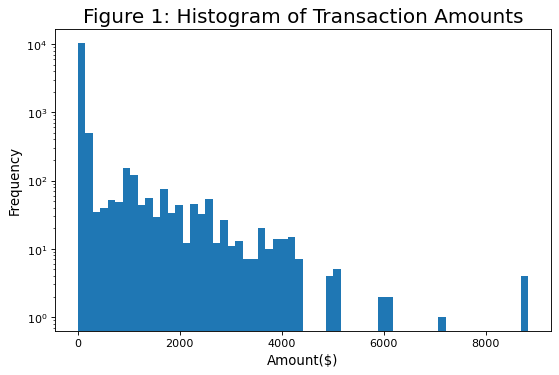

In [122]:
# draw figure and axes
fig, ax = plt.subplots(figsize=(8,5), dpi=80)
# plot histogram with matplotlib library using amount values
plt.hist(x=df.amount, bins=60)
# apply title, labels and font size
plt.xlabel('Amount($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Figure 1: Histogram of Transaction Amounts', fontsize=18)
# apply log transformation to the positively skewed data to get a better visual
ax.set_yscale('log')
# save figure to file
fig.savefig('hist1.jpg')


In [144]:
df.index.year

Int64Index([2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='timestamp', length=12043)

In [145]:
df.index.month

Int64Index([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='timestamp', length=12043)

In [146]:
df.index.time

array([datetime.time(1, 1, 15), datetime.time(1, 13, 45),
       datetime.time(1, 26, 15), ..., datetime.time(23, 34, 25),
       datetime.time(23, 47, 5), datetime.time(23, 59, 44)], dtype=object)

In [156]:
df.index.strftime('%m/%d/%Y')

Index(['08/01/2018', '08/01/2018', '08/01/2018', '08/01/2018', '08/01/2018',
       '08/01/2018', '08/01/2018', '08/01/2018', '08/01/2018', '08/01/2018',
       ...
       '10/31/2018', '10/31/2018', '10/31/2018', '10/31/2018', '10/31/2018',
       '10/31/2018', '10/31/2018', '10/31/2018', '10/31/2018', '10/31/2018'],
      dtype='object', name='timestamp', length=12043)

In [157]:
df.index.strftime('%H:%M')

Index(['01:01', '01:13', '01:26', '01:38', '01:51', '02:00', '02:23', '04:11',
       '04:40', '06:00',
       ...
       '22:22', '22:51', '23:00', '23:00', '23:00', '23:09', '23:21', '23:34',
       '23:47', '23:59'],
      dtype='object', name='timestamp', length=12043)

In [152]:
df.index.day_name()

Index(['Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       ...
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday',
       'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday', 'Wednesday'],
      dtype='object', name='timestamp', length=12043)

In [165]:
df.index.to_period('M')

PeriodIndex(['2018-08', '2018-08', '2018-08', '2018-08', '2018-08', '2018-08',
             '2018-08', '2018-08', '2018-08', '2018-08',
             ...
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10'],
            dtype='period[M]', name='timestamp', length=12043, freq='M')

In [116]:
s = pd.CategoricalDtype(categories=['authorized', 'posted'], ordered=True)
df.status = df.status.astype(s)

In [152]:
b = pd.BooleanDtype()
df.card_present_bool = df.card_present_cat.astype(b)

In [153]:
df.card_present_bool

0         True
1        False
2         True
3         True
4         True
         ...  
12038    False
12039     True
12040     True
12041     True
12042     True
Name: card_present_cat, Length: 12043, dtype: boolean

In [154]:
g = pd.CategoricalDtype(categories=['M', 'F'], ordered=True)
df.gender = df.gender.astype(g)

In [155]:
df.gender

0        F
1        F
2        M
3        F
4        F
        ..
12038    F
12039    M
12040    M
12041    M
12042    M
Name: gender, Length: 12043, dtype: category
Categories (2, object): ['M' < 'F']

In [156]:
df.age = df.age.astype('int32')

In [157]:
df.age

0        26
1        26
2        38
3        40
4        26
         ..
12038    30
12039    20
12040    28
12041    69
12042    31
Name: age, Length: 12043, dtype: int32

In [169]:
df.card_present_cat

0        1
1        0
2        1
3        1
4        1
        ..
12038    0
12039    1
12040    1
12041    1
12042    1
Name: card_present_cat, Length: 12043, dtype: category
Categories (2, int64): [1 < 0]

In [165]:
td = pd.CategoricalDtype(categories=['POS','SALES-POS','PAYMENT','INTER BANK','PAY/SALARY','PHONE BANK'], ordered=True)
df.txn_description = df.txn_description.astype(td)

In [166]:
df.txn_description

0              POS
1        SALES-POS
2              POS
3        SALES-POS
4        SALES-POS
           ...    
12038          POS
12039    SALES-POS
12040          POS
12041    SALES-POS
12042    SALES-POS
Name: txn_description, Length: 12043, dtype: category
Categories (6, object): ['POS' < 'SALES-POS' < 'PAYMENT' < 'INTER BANK' < 'PAY/SALARY' < 'PHONE BANK']

In [193]:
df.dtypes

timestamp           datetime64[ns, UTC]
date                     datetime64[ns]
status                         category
age                               int32
gender                         category
txn_description                category
balance                         float64
amount                          float64
card_present_cat               category
long                            float64
lat                             float64
geometry                         object
merch_suburb                     object
merch_state                      object
merch_geometry                   object
merch_long                      float64
merch_lat                       float64
dtype: object

In [188]:
df.txn_description

0              POS
1        SALES-POS
2              POS
3        SALES-POS
4        SALES-POS
           ...    
12038          POS
12039    SALES-POS
12040          POS
12041    SALES-POS
12042    SALES-POS
Name: txn_description, Length: 12043, dtype: category
Categories (6, object): ['POS' < 'SALES-POS' < 'PAYMENT' < 'INTER BANK' < 'PAY/SALARY' < 'PHONE BANK']

Insight: EFTPOS transactions top the list when it comes to most transactions conducted.

<AxesSubplot:>

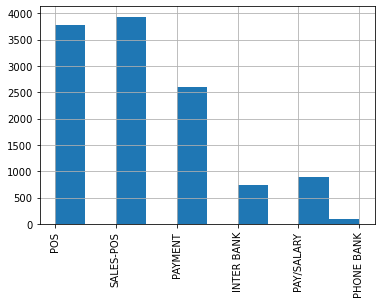

In [180]:
df.txn_description.hist(xrot=90)

Insight: Majority of the transactions are conducted by ages 30 and below

<AxesSubplot:>

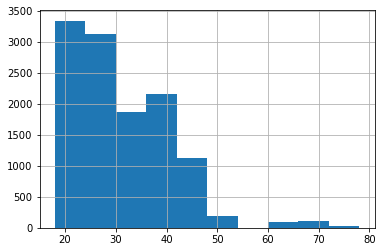

In [172]:
df.age.hist()

In [174]:
time_group = df.groupby('timestamp').sum()

Q: What time of day is the most active for transaction activity? Around 11:06 AM till 16:40 PM

<AxesSubplot:xlabel='timestamp'>

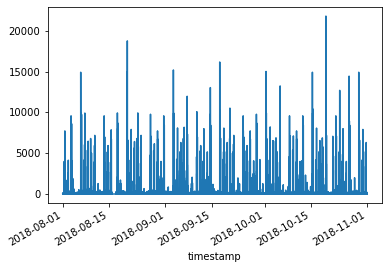

In [175]:
time_group['amount'].plot()

Plot for balance versus time

<AxesSubplot:xlabel='time', ylabel='balance'>

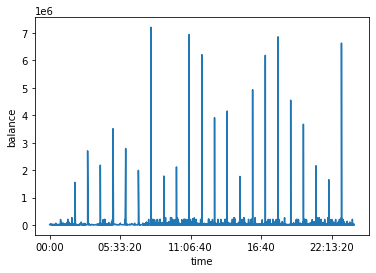

In [73]:
time_group['balance'].plot(ylabel= 'balance')

The plot below shows that overall, people approximating the age of 40 have a higher balance kept in the bank than most other age groups

<AxesSubplot:xlabel='age', ylabel='balance'>

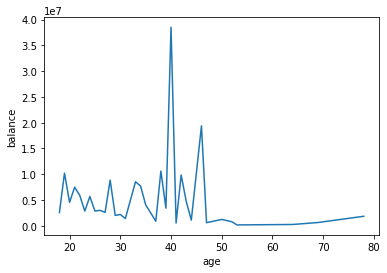

In [32]:
age_group = df.groupby('age').sum()
age_group['balance'].plot(ylabel='balance')


Transactional amounts peak up in ages 20 and 40 years old

<AxesSubplot:xlabel='age', ylabel='amount'>

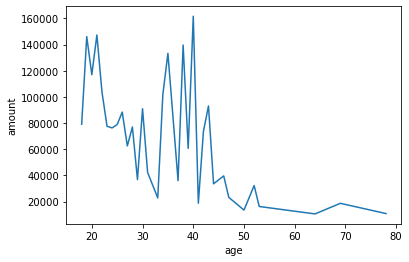

In [73]:
age_group['amount'].plot(ylabel='amount')

In [84]:
# this code sorts the table into authorized vs posted transactions as these columns shows
# high functional dependencies among the columns, which is a violation of 2NF
mask_authorized = df.status == 'authorized'
trans_authorized = df[mask_authorized]
mask_posted = df.status == 'posted'
trans_posted = df[mask_posted]

In [89]:
trans_authorized

,timestamps,date,status,age,gender,txn_description,balance,amount,card_present_flag,long,lat,geometry,merchant_suburb,merchant_state,merchant_long_lat,merch_long,merch_lat,time
0,2018-08-01 01:01:15+00:00,2018-08-01,authorized,26,F,POS,35.39,16.25,1.0,153.41,-27.95,153.41 -27.95,Ashmore,QLD,153.38 -27.99,153.38,-27.99,01:01:15
1,2018-08-01 01:13:45+00:00,2018-08-01,authorized,26,F,SALES-POS,21.20,14.19,0.0,153.41,-27.95,153.41 -27.95,Sydney,NSW,151.21 -33.87,151.21,-33.87,01:13:45
2,2018-08-01 01:26:15+00:00,2018-08-01,authorized,38,M,POS,5.71,6.42,1.0,151.23,-33.94,151.23 -33.94,Sydney,NSW,151.21 -33.87,151.21,-33.87,01:26:15
3,2018-08-01 01:38:45+00:00,2018-08-01,authorized,40,F,SALES-POS,2117.22,40.90,1.0,153.10,-27.66,153.10 -27.66,Buderim,QLD,153.05 -26.68,153.05,-26.68,01:38:45
4,2018-08-01 01:51:15+00:00,2018-08-01,authorized,26,F,SALES-POS,17.95,3.25,1.0,153.41,-27.95,153.41 -27.95,Mermaid Beach,QLD,153.44 -28.06,153.44,-28.06,01:51:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,2018-10-31 23:09:06+00:00,2018-10-31,authorized,30,F,POS,14054.14,9.79,0.0,149.83,-29.47,149.83 -29.47,Ringwood,VIC,145.23 -37.81,145.23,-37.81,23:09:06
12039,2018-10-31 23:21:46+00:00,2018-10-31,authorized,20,M,SALES-POS,9137.79,63.87,1.0,151.22,-33.87,151.22 -33.87,Casula,NSW,150.88 -33.96,150.88,-33.96,23:21:46
12040,2018-10-31 23:34:25+00:00,2018-10-31,authorized,28,M,POS,45394.57,43.96,1.0,151.12,-33.89,151.12 -33.89,Kings Park,NSW,150.92 -33.74,150.92,-33.74,23:34:25
12041,2018-10-31 23:47:05+00:00,2018-10-31,authorized,69,M,SALES-POS,11350.67,30.77,1.0,144.96,-37.76,144.96 -37.76,Oakleigh,VIC,145.09 -37.91,145.09,-37.91,23:47:05


In [105]:
df.card_present_flag = df.card_present_flag.astype('int')

KeyError: "None of [Int64Index([1, 0, 1, 1, 1, 0, 1, 1, 1, 0,\n            ...\n            1, 1, 0, 0, 0, 0, 1, 1, 1, 1],\n           dtype='int64', length=12043)] are in the [columns]"